In [2]:
## Importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from itertools import islice
import matplotlib.pyplot as plt

### Problem 1. Part c)

In [ ]:
## Defining parameters
a = 2.9; x0 = 0.62; nsteps = 1000;

## Initializing an array of zeros
x = np.zeros(nsteps); x[0] = x0;

## Running simulation
for ii in np.arange(1,nsteps): 
    x[ii] = a * x[ii-1] * (1 - x[ii-1])

# plot results
plt.plot(x); plt.xlabel('Time steps'); plt.ylabel('x')

In [ ]:
(a-1)/a

### Problem 1. Part d)

In [ ]:
## Defining range of a values
a_range = np.arange(3.4, 3.86, 0.05)

## Setting the number of iterations
nsteps = 600

## Initializing an array with x_0 = 0.5
x = np.zeros(nsteps); x[0] = 0.5

## Initializing a dataframe to store results
res = pd.DataFrame(columns = ['a', 'value'])

## Considerng the logistic map for all values of a:
for i, a in enumerate(a_range):
    
    for j in np.arange(1, nsteps):
        
        x[j] = a * x[j-1] * (1 - x[j-1])
    
    ## Extracting unique values from the last 300 entries
    unique = np.unique(x[300:])
    
    ## Storing unique values from most recent iteration
    new = pd.DataFrame({'a': np.repeat(a, len(unique)), 'value': unique})
    
    ## Appending to results
    res = pd.concat([res, new], ignore_index = True)

In [ ]:
## Plotting res dataframe
plt.figure(figsize = (12, 8)) 
plt.scatter(res['a'], res['value'], marker = '.', color = 'forestgreen', s = 60)
plt.title('Logistic Map Orbit Diagram', size = 24, fontweight = 'semibold', pad = 16)
plt.xlabel('a', size = 20, style = 'italic')
plt.ylabel('Unique Values', size = 20, style = 'italic')
plt.xticks(a_range) 
plt.grid(alpha = 0.3)
plt.show()

In [ ]:
## Defining range of a values
a_range = np.arange(2.8, 3.99, 0.001)

## Setting the number of iterations
nsteps = 600

## Initializing an array with x_0 = 0.5
x = np.zeros(nsteps); x[0] = 0.5

## Initializing a dataframe to store results
res = pd.DataFrame(columns = ['a', 'value'])

## Considerng the logistic map for all values of a:
for i, a in enumerate(a_range):
    
    for j in np.arange(1, nsteps):
        
        x[j] = a * x[j-1] * (1 - x[j-1])
    
    ## Extracting unique values from the last 300 entries
    unique = np.unique(x[300:])
    
    ## Storing unique values from most recent iteration
    new = pd.DataFrame({'a': np.repeat(a, len(unique)), 'value': unique})
    
    ## Appending to results
    res = pd.concat([res, new], ignore_index = True)

In [ ]:
## Plotting res dataframe
plt.figure(figsize = (12, 8)) 
plt.plot('a', 'value', data = res, linestyle = 'none', marker = '.', alpha = 0.5)
plt.title('Logistic Map Orbit Diagram', size = 18)
plt.xlabel('a value', size = 14)
plt.ylabel('Unique Value', size = 14)
plt.grid()
plt.show()

### Problem 2. Part b) i.

In [ ]:
V = np.arange(-4, 6, 0.01)
I_vals = np.array([-10, -8, -6, -4, -2])
res = pd.DataFrame({'V': V})
palette = plt.get_cmap('Set1')
plt.figure(figsize = (12, 8))

for i, I in enumerate(I_vals):
    dV_dt = V**2 + I
    plt.plot(V, dV_dt, marker = '', color = palette(i), label = I, alpha = 1)
    plt.scatter([np.sqrt(np.abs(I))], [0], marker='o', s = 60, color = palette(i))
    plt.scatter([-np.sqrt(np.abs(I))], [0], marker='*', s = 100, color = palette(i))
    
plt.title('dV/dt vs. V for I < 0', size = 20, fontweight = 'semibold', pad = 16)
plt.xlabel('V', size = 20, style = 'italic')
plt.ylabel('dV/dt', size = 20, style = 'italic')
plt.grid()
plt.legend(title = 'I-Value', fontsize = 12)
plt.show()

## Plot dV against V and locate Vrest and Vthres when I < 0. 
## What about when I > 0?

In [ ]:
V = np.arange(-4, 6, 0.01)
I_vals = np.array([2, 4, 6, 8, 10])
res = pd.DataFrame({'V': V})
palette = plt.get_cmap('Dark2')
plt.figure(figsize = (12, 8))

for i, I in enumerate(I_vals):
    dV_dt = V**2 + I
    plt.plot(V, dV_dt, marker = '', color = palette(i), label = I, alpha = 1)
    
plt.title('dV/dt vs. V for I < 0', size = 20, fontweight = 'semibold', pad = 16)
plt.xlabel('V', size = 20, style = 'italic')
plt.ylabel('dV/dt', size = 20, style = 'italic')
plt.grid()
plt.legend(title = 'I-Value', fontsize = 12)
plt.show()

## Plot dV against V and locate Vrest and Vthres when I < 0. 
## What about when I > 0?

### ii. A

In [ ]:
## iii. I = 10, simulatating the QIF for 10 seconds with any initial condition. 
## What’s the firing behaviour? Does the initial condition you choose matter? Explain.


## Setting parameter values
I = 10
ebs = 0.05
V_rest = -np.sqrt(np.abs(I))
V_thres = np.sqrt(np.abs(I))
V_reset = V_thres + ebs
V_peak = 100
V0 = 20

## Setting desired time
dt     = 0.001
T      = 10
time   = np.linspace(dt,T,int(T/dt))

def initialize_simulation():
    V = np.zeros(time.size)
    spikes = np.zeros(time.size)
    V[0] = V0
    return V, spikes

def plot_V(time,V,timeSpikes):
    plt.figure(figsize = (12, 6))
    plt.plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size)*V_peak, 'ro')
    plt.ylabel('V(t)')
    plt.xlabel('time (seconds)')

def integrate_and_fire(V, spikes, i, I):
    dV = V[i-1]**2 + I
    V[i] = (dV*dt) + V[i-1]
    if (V[i] >= V_peak):
        V[i] = V_reset
        spikes[i] = 1
    return V, spikes

In [ ]:
## Initializing
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time),1,None):
    
    V, spikes = integrate_and_fire(V, spikes, i, I)

V[spikes==1] = V_peak

## Plotting V(t)
plot_V(time, V, time[spikes==1])
plt.title('Firing Activity Simulation')
plt.grid()

In [11]:
## ii. I = -10, simulatating the QIF for 10 seconds with the initial condition:

# Vreset = Vthres ± ε
# Let V0 > Vthres
# Explain the spiking pattern in terms of the fixed points we chose to be Vreset and Vthres.

## Setting parameter values
I = -10
ebs = 0.01
V_rest = -np.sqrt(np.abs(I))
V_thres = np.sqrt(np.abs(I))
V_reset = V_thres + ebs
V_peak = 100
V0 = V_thres + 1

## Setting desired time
dt     = 0.001
T      = 10
time   = np.linspace(dt,T,int(T/dt))

def initialize_simulation():
    V = np.zeros(time.size)
    spikes = np.zeros(time.size)
    V[0] = V0
    return V, spikes

def plot_V(time,V,timeSpikes):
    plt.figure(figsize = (12, 6))
    plt.plot(time, V, 'k', timeSpikes, np.ones(timeSpikes.size)*V_peak, 'ro')
    plt.ylabel('V(t)')
    plt.xlabel('time (seconds)')

def integrate_and_fire(V, spikes, i, I):
    dV = V[i-1]**2 + I
    V[i] = (dV*dt) + V[i-1]
    if (V[i] >= V_peak):
        V[i] = V_reset
        spikes[i] = 1
    return V, spikes

In [12]:
print(V_thres)
print(V_reset)

3.1622776601683795
3.1722776601683793


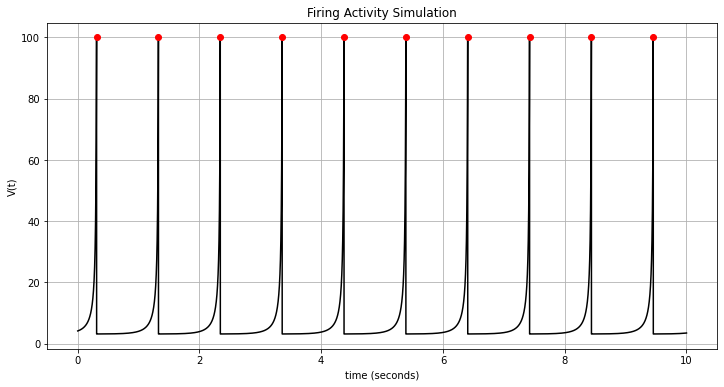

In [13]:
## Initializing
V, spikes = initialize_simulation()

## Iterating over each time step
for i, t in islice(enumerate(time),1,None):
    
    V, spikes = integrate_and_fire(V, spikes, i, I)

V[spikes==1] = V_peak

## Plotting V(t)
plot_V(time, V, time[spikes==1])
plt.title('Firing Activity Simulation')
plt.grid()

In [9]:
## Setting parameter values
I = 0.25
ebs = 0.05
V_rest = -np.sqrt(np.abs(I))
V_thres = np.sqrt(np.abs(I))
V_reset = 0
V_peak = 1
V0 = 0.4

## Setting up time
dt     = 0.001   # simulation time step (seconds)
T      = 10  # total time to simulate (seconds)
time   = np.linspace(dt,T,int(T/dt)) # vector of timepoints we will simulate

## Defining helper function
def initialize_simulation():
    # initialize membrane potential vector 'V' and spike vector 'spikes'
    V = np.zeros(time.size) # preallocate vector for simulated membrane potentials
    spikes = np.zeros(time.size) # vector to denote when spikes happen - spikes will be added after LIF simulation
    V[0] = V0 # set first time point to resting potential
    return V, spikes

def plot_potentials(time,V,timeSpikes):
    # plots membrane potential (V) against time (time), and marks spikes with red markers (timeSpikes)
    plt.show()
    plt.plot(time,V,'k',timeSpikes,np.ones(timeSpikes.size)*V_peak,'ro')
    plt.ylabel('membrane potential (mV)')
    plt.xlabel('time (seconds)')

def integrate_and_fire(V, spikes, i, I):
    ## Function to integrate changes in local membrane potential and fire if threshold reached
    # V - vector of membrane potential
    # spikes - spike marker vector
    # i - index (applied to V and spikes) for current time step
    # I - input current at this time step (scalar of unit amp)
    
    # 1: calculate change in membrane potential (dV)
    dV = V[i-1]**2 + I
    
    # 2: integrate over given time step (Euler method)
    V[i] = (dV*dt) + V[i-1]
    
    # 3: does the membrane potential exceed threshold (V > Vth)?
    if (V[i] >= V_peak):
        V[i] = V_reset
        spikes[i] = 1
    
    return V, spikes # output the membrane potential vector and the {0,1} vector of spikes

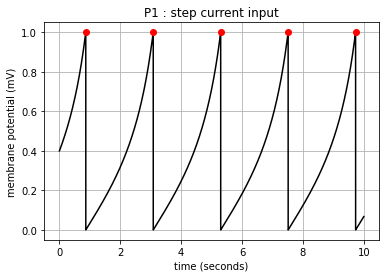

In [10]:
V, spikes = initialize_simulation()

# iterate over each time step
for i, t in islice(enumerate(time),1,None):
    
    #effect change in potential and fire (if appropriate)
    V, spikes = integrate_and_fire(V, spikes, i, I)

# since we didn't add in the spikes directly to the membrane potentials (this would cause wild increases in potential),
# ...we must add it back in now
V[spikes==1] = V_peak

# # plot membrane potential
plot_potentials(time, V, time[spikes==1])
plt.title('P1 : step current input')
plt.grid()

In [ ]:
V

In [ ]:
spikes

In [ ]:
# parameters
Rm     = 1e6    # resistance (ohm)
Cm     = 2e-8   # capacitance (farad)
taum   = Rm*Cm  # time constant (seconds)
EL     = -.060  # resting membrane potential (volt)
Vreset = -.070  # membrane potential after spike (volt)
Vth    = -.050  # spike threshold (volt)
Vs     = .020   # spiking potential (volt)


dt     = .001   # simulation time step (seconds)
T      = 1.0    # total time to simulate (seconds)
time   = np.linspace(dt,T,int(T/dt)) # vector of timepoints we will simulate

## Helper functions:
def initialize_simulation():
    # initialize membrane potential vector 'V' and spike vector 'spikes'
    V      = np.zeros(time.size) # preallocate vector for simulated membrane potentials
    spikes = np.zeros(time.size) # vector to denote when spikes happen - spikes will be added after LIF simulation
    V[0]   = EL # set first time point to resting potential
    return V,spikes

def plot_potentials(time,V,timeSpikes):
    # plots membrane potential (V) against time (time), and marks spikes with red markers (timeSpikes)
    plt.show()
    plt.plot(time,V,'k',timeSpikes,np.ones(timeSpikes.size)*Vs,'ro')
    plt.ylabel('membrane potential (mV)')
    plt.xlabel('time (seconds)')
    
## Euler integration
def integrate_and_fire( V, spikes, i, Ie ):
    # function to integrate changes in local membrane potential and fire if threshold reached
    # V - vector of membrane potential
    # spikes - spike marker vector
    # i - index (applied to V and spikes) for current time step
    # Ie - input current at this time step (scalar of unit amp)

    dV = ((EL-V[i-1]) + (Rm*Ie)) / taum # calculate change in membrane potential
    V[i] = V[i-1] + (dV*dt) # integrate over given time step

    # is potential greater than the threshold?
    if V[i] > Vth:
        V[i] = Vreset
        spikes[i] = 1
    return V,spikes

In [ ]:

#////////////////////////////////////
#  problem 1 - step current input //
#//////////////////////////////////
#
# Implement a leaky integrate and fire (LIF) neuron with parameters given 
# above. 
# 
# Create a current input which:
#       - starts at 0 A
#       - steps up to 15 nA at stim_time[0]
#       - steps down to 0 A at stim_time[1]
#
# Output:
# Plot the resulting simulated membrane potential of the LIF neuron.
#

# problem-specific parameters
stim_time = [.2,.8] # time (seconds) when current turns ON and turns OFF


V,spikes = initialize_simulation()

# iterate over each time step
for i, t in islice(enumerate(time),1,None):
    # is input current on?
    if t>stim_time[0] and t < stim_time[1]:
        Ie = 1.5e-8
    else:
        Ie = 0

    # effect change in potential and fire (if appropriate)
    V,spikes = integrate_and_fire(V,spikes,i,Ie)

# since we didn't add in the spikes directly to the membrane potentials (this would cause wild increases in potential),
# ...we must add it back in now
V[spikes==1] = Vs

# plot membrane potential
plot_potentials(time,V,time[spikes==1])
plt.title('P1 : step current input')